# Machine Learning Classification Model

In [ ]:
???

,change_tomorrow_direction,prediction
Date,,
2016-12-08,UP,UP
2016-12-09,UP,UP
...,...,...
2023-03-14,UP,DOWN
2023-03-15,UP,UP


## Load the data

In [3]:
import pandas as pd

df = pd.read_excel('data/Microsoft_LinkedIn_Processed.xlsx', parse_dates=['Date'], index_col=0)
df

,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction
Date,,,,,,,
2016-12-08,56.325228,56.582507,55.902560,56.058762,21220800,1.549143,UP
2016-12-09,56.214968,56.959234,56.169027,56.940857,27349400,0.321692,UP
...,...,...,...,...,...,...,...
2023-03-14,256.750000,261.070007,255.860001,260.790009,33620300,1.751806,UP
2023-03-15,259.980011,266.480011,259.209991,265.440002,46028000,3.895731,UP


## Machine Learning Model

### Separate the data

1. Target: which variable do you want to predict?
2. Explanatory: which variables will you use to calculate the prediction?

In [9]:
target = df.change_tomorrow_direction

In [12]:
explanatory = df.drop(columns=['change_tomorrow', 'change_tomorrow_direction'])

### Compute the model

The following Python code will compute the numbers of the mathematical equation that we will use to calculate if the ticker goes UP or DOWN.

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
model_dt = DecisionTreeClassifier(max_depth=15)

In [63]:
model_dt.fit(X=explanatory, y=target)

DecisionTreeClassifier(max_depth=15)

### Visualize the model

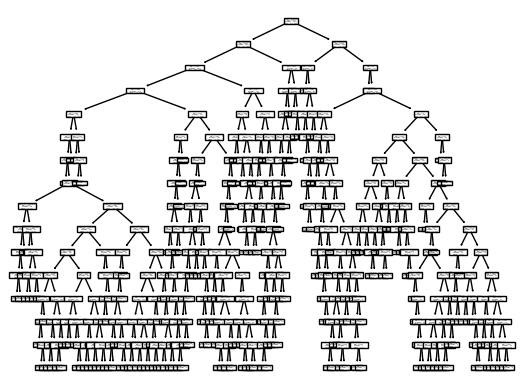

In [64]:
from sklearn.tree import plot_tree

plot_tree(decision_tree=model_dt, feature_names=model_dt.feature_names_in_);

### Calculate the predictions

In [65]:
y_pred = model_dt.predict(X=explanatory)

In [66]:
df_predictions = df[['change_tomorrow_direction']].copy()
df_predictions['prediction'] = y_pred
df_predictions

,change_tomorrow_direction,prediction
Date,,
2016-12-08,UP,UP
2016-12-09,UP,UP
...,...,...
2023-03-14,UP,DOWN
2023-03-15,UP,UP


### Evaluate the model: compare predictions with the reality

In [67]:
comp = df_predictions.change_tomorrow_direction == df_predictions.prediction

In [68]:
comp.sum()/len(comp)

0.8305837563451777

In [69]:
model_dt.score(X=explanatory, y=target)

0.8305837563451777

## Save the model into a file

- We'll write the numbers of the Decision Tree's mathematical equation into a file.

In [71]:
import os

In [72]:
os.makedirs('models')

In [70]:
model_dt

DecisionTreeClassifier(max_depth=15)

In [73]:
import pickle

In [74]:
with open('models/model_dt_classification.pkl', 'wb') as f:
    pickle.dump(model_dt, f)